In [ ]:
# !pip install plotly
# !conda install -c plotly plotly-orca

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
!ls ../data

2007-2016-Homelessnewss-USA.csv
README.md
countypres_2000-2020.csv
homeless_count_Econ_Politics_by_state.csv
homeless_count_with_housing_price_by_state.csv
profile_by_county_1969_2019.csv
scaled_X_test.csv
scaled_X_train.csv
scaled_y_test.csv
scaled_y_train.csv


# Read Datasets

In [4]:
df_homeless = pd.read_csv("../data/2007-2016-Homelessnewss-USA.csv")
df_homeless

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842
...,...,...,...,...,...,...
86524,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3


In [5]:
df_politics = pd.read_csv("../data/countypres_2000-2020.csv")
df_politics

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245,4032,20220315,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,20220315,TOTAL
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46,3560,20220315,TOTAL
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47,3560,20220315,TOTAL


In [6]:
df_econ = pd.read_csv("../data/profile_by_county_1969_2019.csv", encoding='latin-1')
df_econ

/var/folders/8b/_p73f6h51q16gtmwyy4cv8yw0000gn/T/ipykernel_66970/2483043623.py:1: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_econ = pd.read_csv("../data/profile_by_county_1969_2019.csv", encoding='latin-1')


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,CAINC30,10.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,12541995000,13315478000,13998383000,14175503000,14982715000,15717140000,16151881000,16937582000,17839255000,18542262000
1,"""00000""",United States,,CAINC30,45.0,...,Net earnings by place of residence,Thousands of dollars,609767000,647228000,...,8044221000,8531667000,8956340000,9132669000,9539185000,9915088000,10145493000,10626821000,11167886000,11667012000
2,"""00000""",United States,,CAINC30,50.0,...,Personal current transfer receipts,Thousands of dollars,62322000,74733000,...,2325117000,2358654000,2362988000,2424297000,2541510000,2685370000,2776746000,2855049000,2970254000,3125174000
3,"""00000""",United States,,CAINC30,60.0,...,Income maintenance benefits 1/,Thousands of dollars,7275000,9897000,...,256034000,264137000,267614000,271171000,270971000,273685000,270259000,268468000,260380000,268682000
4,"""00000""",United States,,CAINC30,70.0,...,Unemployment insurance compensation,Thousands of dollars,2328000,4200000,...,139715000,107871000,84439000,63049000,35787000,32860000,32482000,30756000,28302000,28075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99137,"""98000""",Far West,8.0,CAINC30,310.0,...,Average nonfarm proprietors' income,Dollars,7216.0,7201.0,...,33289.0,34288.0,37835.0,37052.0,36527.0,36406.0,37290.0,37791.0,38275.0,38651.0
99138,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99139,CAINC30: Economic Profile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99140,"Last updated: November 17, 2020-- new statisti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Processing

## Homeless Dataset

https://www.kaggle.com/code/adamschroeder/homelessness-comparison-between-states/data?select=2007-2016-Homelessnewss-USA.csv

In [7]:
df_homeless['Year_only'] = pd.DatetimeIndex(df_homeless['Year']).year 

In [8]:
df_homeless_sub = df_homeless.query("Year_only == 2008 or Year_only == 2016")

In [9]:
df_homeless_sub['Count'] = df_homeless_sub['Count'].str.replace(',', '').astype(float)

/var/folders/8b/_p73f6h51q16gtmwyy4cv8yw0000gn/T/ipykernel_66970/1261704679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_homeless_sub['Count'] = df_homeless_sub['Count'].str.replace(',', '').astype(float)


In [10]:
df_homeless_sub.describe()

,Count,Year_only
count,21648.000000,21648.000000
mean,260.139320,2014.239468
std,1448.592168,3.314407
min,0.000000,2008.000000
25%,2.000000,2016.000000
50%,25.000000,2016.000000
75%,153.000000,2016.000000
max,73523.000000,2016.000000


In [11]:
df_homeless_sub = df_homeless_sub.groupby(["Year_only","State"])["Count"].sum().reset_index()
df_homeless_sub.columns = ["year", "state_abbrev", "homeless_count"]
df_homeless_sub

,year,state_abbrev,homeless_count
0,2008,AK,7462.0
1,2008,AL,23652.0
2,2008,AR,14806.0
3,2008,AZ,56146.0
4,2008,CA,626632.0
...,...,...,...
103,2016,VT,5762.0
104,2016,WA,103862.0
105,2016,WI,27656.0
106,2016,WV,7020.0


## Politics Dataset

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

In [12]:
df_politics_sub = (
df_politics.query("year == 2008 or year == 2016")
            .query("party == 'DEMOCRAT'")
            .rename(columns = {"state_po":"state_abbrev"})
            .groupby(["year", "state_abbrev"]).sum().reset_index()
)[['year', 'state_abbrev', 'candidatevotes', 'totalvotes']]

In [13]:
df_politics_sub

,year,state_abbrev,candidatevotes,totalvotes
0,2008,AK,123594,326197
1,2008,AL,813479,2099819
2,2008,AR,422310,1086617
3,2008,AZ,1034707,2293475
4,2008,CA,8274473,13561900
...,...,...,...,...
97,2016,VT,178573,315077
98,2016,WA,1742718,3209214
99,2016,WI,1381823,2975753
100,2016,WV,188794,713051


In [14]:
df_politics_sub['democrat_perc'] = df_politics_sub['candidatevotes']/df_politics_sub['totalvotes'] * 100


In [15]:
df_politics_sub = df_politics_sub[['year', 'state_abbrev', 'democrat_perc']]
df_politics_sub

,year,state_abbrev,democrat_perc
0,2008,AK,37.889374
1,2008,AL,38.740434
2,2008,AR,38.864660
3,2008,AZ,45.115251
4,2008,CA,61.012638
...,...,...,...
97,2016,VT,56.675987
98,2016,WA,54.303577
99,2016,WI,46.436079
100,2016,WV,26.476928


## Economy Dataset

https://www.kaggle.com/datasets/davidbroberts/us-economic-profile-by-county?resource=download&select=profile_by_county_1969_2019.csv

In [16]:
# dict of state name to abbrevation
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands": "VI",
}

In [17]:
states_FIPS = ['01000', '02000', '03000', '04000', '05000', '06000', '07000', '08000', '09000']
for i in range(10, 57):
    fips = str(i)+'000'
    states_FIPS.append(fips)

In [18]:
df_econ['GeoFIPS'] = df_econ['GeoFIPS'].str.slice(2,7)

In [19]:
econ_cols = [' Per capita personal income 4/', ' Per capita net earnings 4/', 'Total employment (number of jobs)', ' Average wages and salaries']

The following cell blocks for df_econ_sub has been commented out because it could run for some pandas version, but might generate error for others. Therefore, we stored the wrangled dataframe in a .csv file and read it in directly. 

In [20]:
# df_econ_sub = (df_econ[['GeoFIPS', 'GeoName', 'Description', '2008', '2016']]
#                  .query("GeoFIPS in @states_FIPS")
#                  .query("Description in @econ_cols")
#                  .assign(state_abbrev = df_econ['GeoName'].map(us_state_to_abbrev))
#                  .drop(columns = ['GeoFIPS', 'GeoName'])               
#                 )

In [21]:
# df_econ_sub_08 = (df_econ_sub.drop(columns = ['2016'])
#                              .assign(year = 2008)
#                  )
# df_econ_sub_16 = (df_econ_sub.drop(columns = ['2008'])
#                              .assign(year = 2016)
#                  )

In [22]:
# df_econ_sub_08 = (df_econ_sub_08.pivot(index=['year', 'state_abbrev'], columns='Description', values='2008').reset_index()
#                                 .rename(columns = {' Average wages and salaries':"AvgSalary", ' Per capita net earnings 4/':"PerCapNetEarning", ' Per capita personal income 4/':"PerCapNetIncome", "Total employment (number of jobs)":"TotalNumJobs"})
#                  )

# df_econ_sub_16 = (df_econ_sub_16.pivot(index=['year', 'state_abbrev'], columns='Description', values='2016').reset_index()
#                                 .rename(columns = {' Average wages and salaries':"AvgSalary", ' Per capita net earnings 4/':"PerCapNetEarning", ' Per capita personal income 4/':"PerCapNetIncome", "Total employment (number of jobs)":"TotalNumJobs"})
#                  )


In [ ]:
# df_econ_sub = pd.concat([df_econ_sub_08, df_econ_sub_16])
# df_econ_sub

In [24]:
# df_econ_sub.to_csv("../data/df_econ_sub.csv", index=False)

In [26]:
df_econ_sub = pd.read_csv("../data/df_econ_sub.csv")

In [27]:
df_econ_sub

,year,state_abbrev,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs
0,2008,AK,48527,31586,47749,443538
1,2008,AL,38138,20229,33353,2582591
2,2008,AR,35310,18526,31940,1579283
3,2008,AZ,43311,22318,35563,3402808
4,2008,CA,52524,28770,43890,20654292
...,...,...,...,...,...,...
97,2016,VT,44188,29569,50420,433924
98,2016,WA,58989,34596,55802,4310119
99,2016,WI,46551,30320,47598,3658030
100,2016,WV,41183,20587,37099,890105


# Merge Datasets

In [28]:
df_econ_politcs = (df_homeless_sub.merge(df_politics_sub, how = "left", on = ['year', 'state_abbrev'])
                                  .merge(df_econ_sub, how = "left", on = ['year', 'state_abbrev'])
                  )
df_econ_politcs

,year,state_abbrev,homeless_count,democrat_perc,AvgSalary,PerCapNetEarning,PerCapNetIncome,TotalNumJobs
0,2008,AK,7462.0,37.889374,48527.0,31586.0,47749.0,443538.0
1,2008,AL,23652.0,38.740434,38138.0,20229.0,33353.0,2582591.0
2,2008,AR,14806.0,38.864660,35310.0,18526.0,31940.0,1579283.0
3,2008,AZ,56146.0,45.115251,43311.0,22318.0,35563.0,3402808.0
4,2008,CA,626632.0,61.012638,52524.0,28770.0,43890.0,20654292.0
...,...,...,...,...,...,...,...,...
103,2016,VT,5762.0,56.675987,44188.0,29569.0,50420.0,433924.0
104,2016,WA,103862.0,54.303577,58989.0,34596.0,55802.0,4310119.0
105,2016,WI,27656.0,46.436079,46551.0,30320.0,47598.0,3658030.0
106,2016,WV,7020.0,26.476928,41183.0,20587.0,37099.0,890105.0


In [ ]:
# df_econ_politcs.to_csv("../data/homeless_count_Econ_Politics_by_state.csv", index=False)

# EDA

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## Missing Values

Some states such as Guam, American Samoa, Northern Mariana Islands, Puerto Rico, US Minor Outlying Islands, Virgin Islands have missing values. 

In [30]:
df_econ_politcs = pd.read_csv("../data/homeless_count_Econ_Politics_by_state.csv")

In [31]:
df_econ_politcs.isna().sum()

year                0
state_abbrev        0
homeless_count      0
democrat_perc       6
AvgSalary           6
PerCapNetEarning    6
PerCapNetIncome     6
TotalNumJobs        6
dtype: int64

In [32]:
df_econ_politcs["AvgSalary"] = pd.to_numeric(df_econ_politcs["AvgSalary"])
df_econ_politcs["PerCapNetEarning"] = pd.to_numeric(df_econ_politcs["PerCapNetEarning"])
df_econ_politcs["PerCapNetIncome"] = pd.to_numeric(df_econ_politcs["PerCapNetIncome"])
df_econ_politcs["TotalNumJobs"] = pd.to_numeric(df_econ_politcs["TotalNumJobs"])

In [33]:
df_econ_politcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              108 non-null    int64  
 1   state_abbrev      108 non-null    object 
 2   homeless_count    108 non-null    float64
 3   democrat_perc     102 non-null    float64
 4   AvgSalary         102 non-null    float64
 5   PerCapNetEarning  102 non-null    float64
 6   PerCapNetIncome   102 non-null    float64
 7   TotalNumJobs      102 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.9+ KB


## Correlation between each variable and homeless count

In [34]:
df_econ_politcs.columns

Index(['year', 'state_abbrev', 'homeless_count', 'democrat_perc', 'AvgSalary',
       'PerCapNetEarning', 'PerCapNetIncome', 'TotalNumJobs'],
      dtype='object')

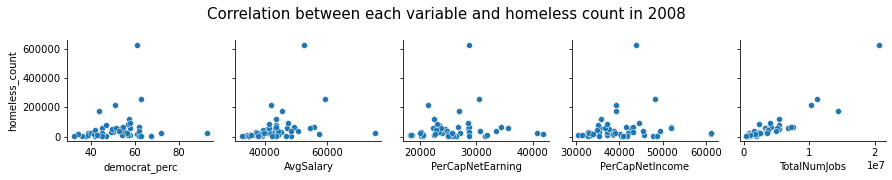

In [36]:
g_08 = sns.pairplot(df_econ_politcs.query("year == 2008"), 
             x_vars=["democrat_perc","AvgSalary","PerCapNetEarning", "PerCapNetIncome", "TotalNumJobs"],
             y_vars=["homeless_count"])

g_08.fig.suptitle('Correlation between each variable and homeless count in 2008', fontsize = 15)
g_08.fig.tight_layout()

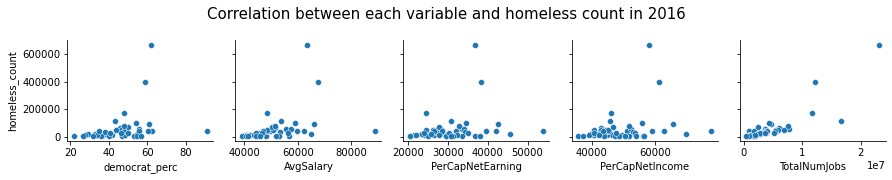

In [37]:
g_16 = sns.pairplot(df_econ_politcs.query("year == 2016"), 
             x_vars=["democrat_perc","AvgSalary","PerCapNetEarning", "PerCapNetIncome", "TotalNumJobs"],
             y_vars=["homeless_count"])

g_16.fig.suptitle('Correlation between each variable and homeless count in 2016', fontsize = 15)
g_16.fig.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap for 2008')

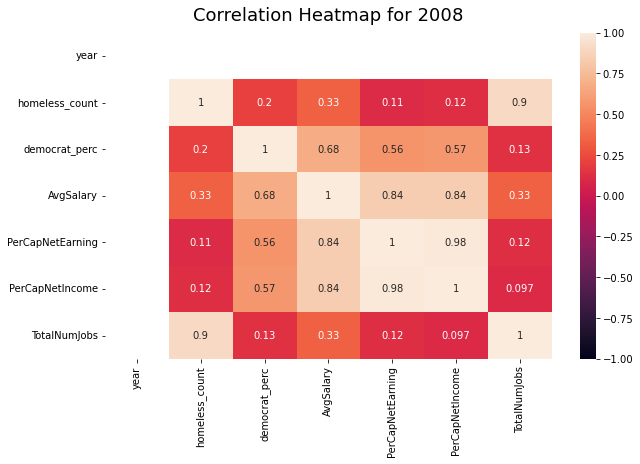

In [38]:
plt.figure(figsize=(10, 6))
heatmap_08 = sns.heatmap(df_econ_politcs.query("year == 2008").corr(), vmin=-1, vmax=1, annot=True)
heatmap_08.set_title('Correlation Heatmap for 2008', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap for 2016')

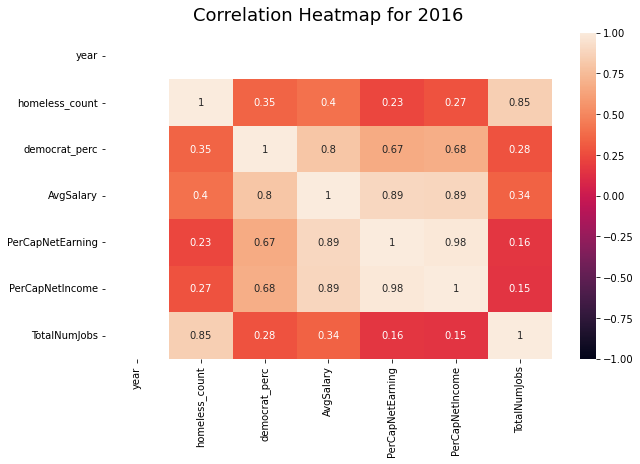

In [39]:
plt.figure(figsize=(10, 6))
heatmap_16 = sns.heatmap(df_econ_politcs.query("year == 2016").corr(), vmin=-1, vmax=1, annot=True)
heatmap_16.set_title('Correlation Heatmap for 2016', fontdict={'fontsize':18}, pad=12)

## Choropleth graph of homeless count by state

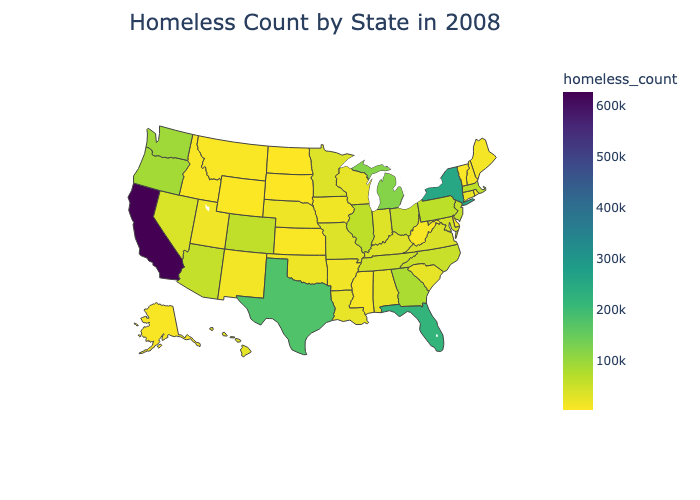

In [76]:
fig = px.choropleth(df_econ_politcs.query("year == 2008"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='homeless_count',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Homeless Count by State in 2008',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")

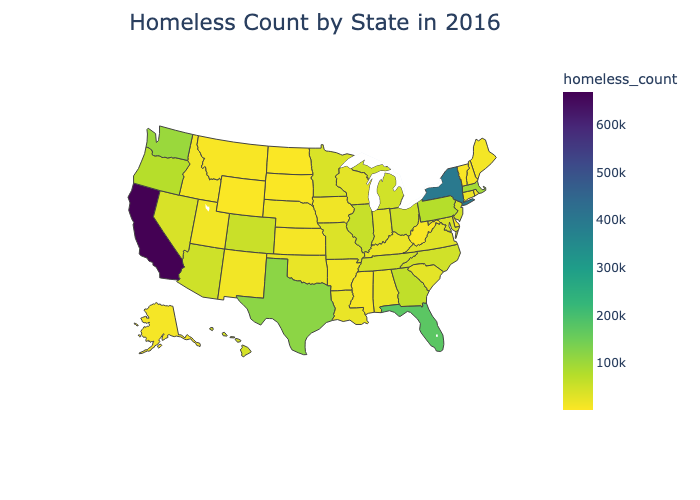

In [77]:
fig = px.choropleth(df_econ_politcs.query("year == 2016"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='homeless_count',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Homeless Count by State in 2016',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


## Choropleth graph of political party by state

In [59]:
df_econ_politcs['win_party'] = df_econ_politcs['democrat_perc'].apply(lambda x:"Democrat" if x>50 else "Republican")

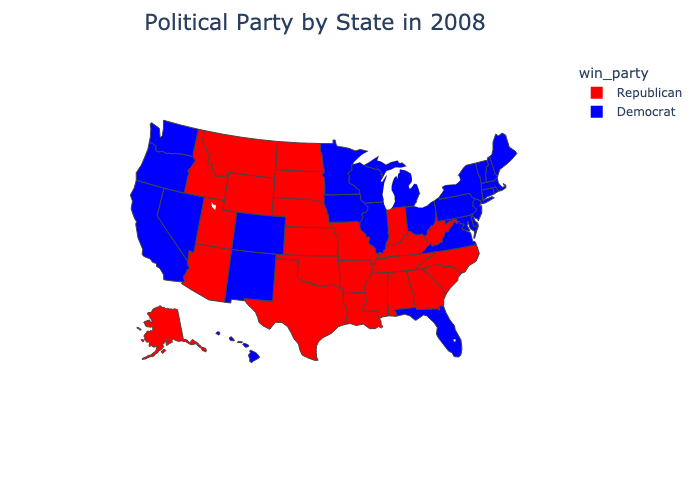

In [78]:
color_scale = {'Republican': 'red', 'Democrat': 'blue'}


fig = px.choropleth(df_econ_politcs.query("year == 2008"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='win_party',
                    color_discrete_map=color_scale, 
                    )

fig.update_layout(
      title_text = 'Political Party by State in 2008',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


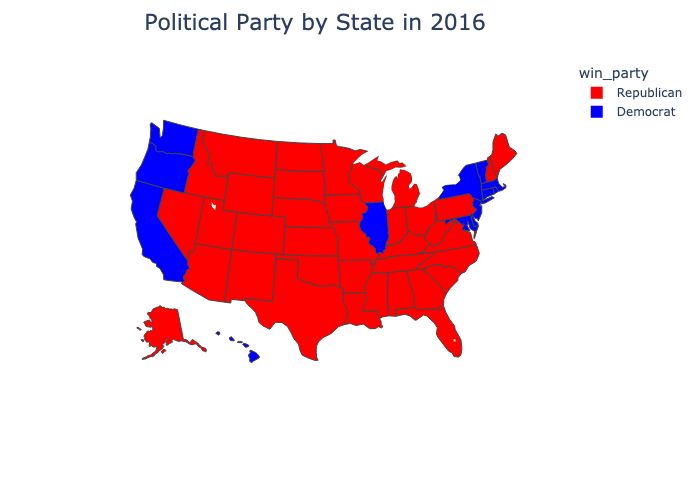

In [79]:
color_scale = {'Republican': 'red', 'Democrat': 'blue'}


fig = px.choropleth(df_econ_politcs.query("year == 2016"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='win_party',
                    color_discrete_map=color_scale, 
                    )

fig.update_layout(
      title_text = 'Political Party by State in 2016',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


## Choropleth graph of average salary by state

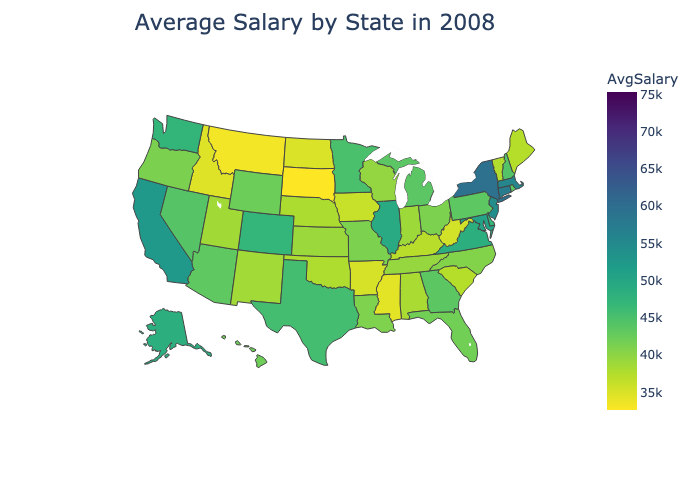

In [80]:
fig = px.choropleth(df_econ_politcs.query("year == 2008"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='AvgSalary',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Average Salary by State in 2008',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


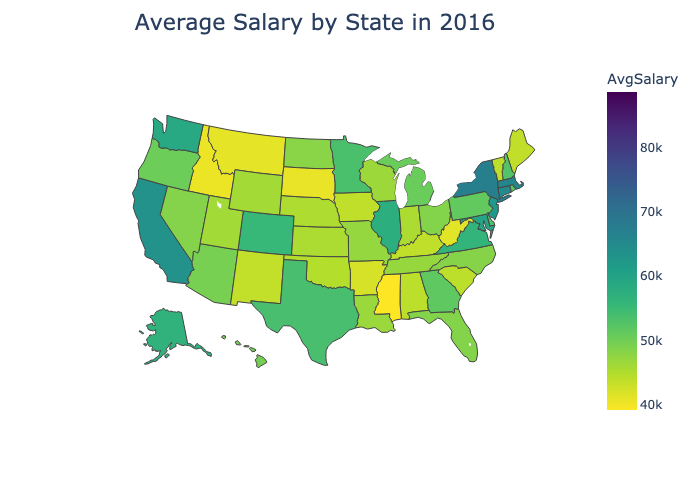

In [81]:
fig = px.choropleth(df_econ_politcs.query("year == 2016"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='AvgSalary',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Average Salary by State in 2016',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


## Choropleth graph of per capita net earning by state

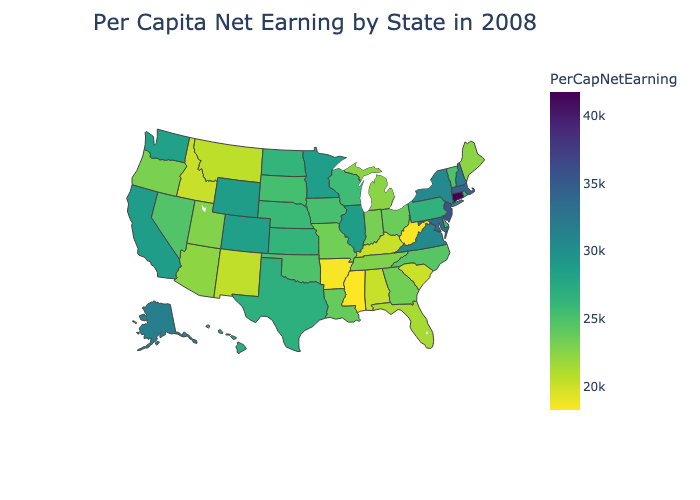

In [82]:
fig = px.choropleth(df_econ_politcs.query("year == 2008"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='PerCapNetEarning',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Per Capita Net Earning by State in 2008',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


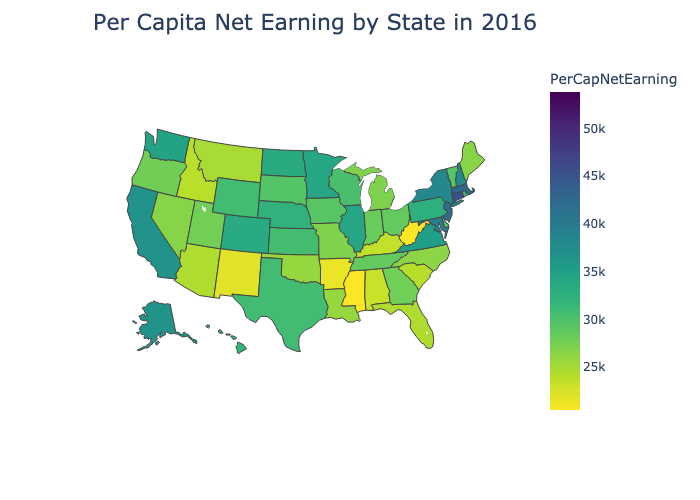

In [83]:
fig = px.choropleth(df_econ_politcs.query("year == 2016"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='PerCapNetEarning',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Per Capita Net Earning by State in 2016',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


## Choropleth graph of Total Number of Jobs by state

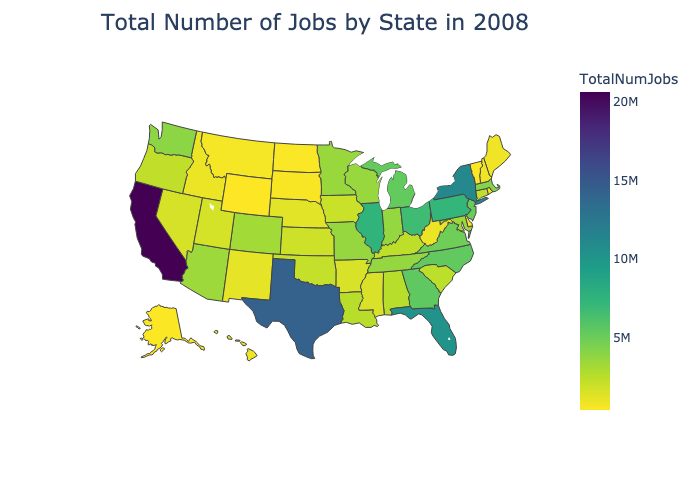

In [84]:
fig = px.choropleth(df_econ_politcs.query("year == 2008"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='TotalNumJobs',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Total Number of Jobs by State in 2008',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")


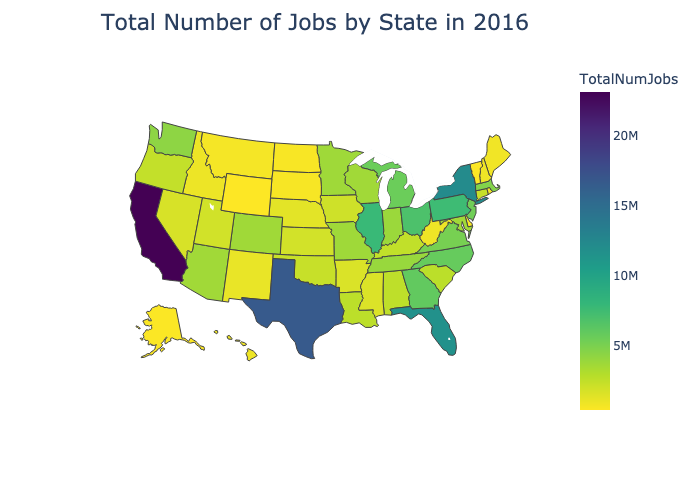

In [85]:
fig = px.choropleth(df_econ_politcs.query("year == 2016"), 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='TotalNumJobs',
                    color_continuous_scale="Viridis_r", 
                    )

fig.update_layout(
      title_text = 'Total Number of Jobs by State in 2016',
      title_font_size = 22,
      title_x=0.45, 
    )

fig.show("png", engine = "orca")
